## Random Forest

Random Forest algorithm is an <b>ensemble of decision trees</b>, which can be used to solve both regression and classification tasks.

Random forest handles both <b>row sampling and feature sampling</b>, compared to standard bagging classifiers.

In random forest, dataset that is passed to random forest model internally uses 2/3 of the data for every decision tree (known as <b>in-bag error</b>) and remaining 1/3 of the data is used for model evaluation on every decision tree (known as <b>out-of-bag error</b>).

<img src="https://miro.medium.com/max/700/1*JX-7eSfyvxEiAoHnulaiLQ.png" width="600">

<b>Assumptions of Random Forest:</b> No specific formal distributions required

<b>Requirement of feature scaling: No</b>

<b>Robust to outliers: Yes</b>

<b>Advantages of Random Forest:</b>
1. Robust to outliers.
2. Works well for non-linear data.
3. Low risk of overfitting.
4. Runs efficiently on large datasets.
5. Feature importance can be determined
6. Model performance not impacted by missing values.

<b>Disadvantages of Random Forest:</b>
1. Slow training.
2. Biased when dealing with categorical variables, as feature selection technique is biased towards preferring variables with more categories.

<b>Time complexity of model training: O(n * log(n) * p * m)</b>

<b>Time complexity of model prediction: O(d*m)</b>

<b>Space complexity of model prediction: O(k*m)</b>

n - Number of training samples

p - Number of features

d - Maximum depth of tree

k - Number of nodes in tree

m - Number of decision trees

<b>Methods to handle imbalanced dataset</b>:
1. Assign class weights to model
2. Resampling techniques (Oversampling/SMOTETomek)

## Factors of forest error rate

In random forest, the forest error rate depends on two factors:

1. <b>Correlation between different decision trees</b>: Higher correlaton would result in higher forest error rate

2. <b>Strength of individual decision tree</b>: Lower error rate of decision tree results in higher strength of decision tree, thus resulting in lower forest error rate

## Feature selection of Random Forest

A special feature available in random forest algorithm is feature selection. 

In scikit-learn, feature importance is computed based on <b>average of gini impurity index</b>. The higher the average of gini impurity index, the higher the importance of the feature in the model.

<b>Steps for computing feature importance in Random Forest algorithm</b>:

1. Count the number of correct votes in original out-of-bag data for every decision tree.

2. Shuffle the order of values of given feature and count number of correct votes for every decision tree.

3. Subtract the count of votes of step 2 from step 1 for every decision tree. 

4. Feature importance for specific feature is the average value from step 3. The value is normalized by taking the standard deviation.

5. Larger score of feature importance indicates higher importance, as building model without its original values provide worse predictions.

## Random Forest Classifier Example

Refer to the following documentation for more details about the use of Random Forest Classification on sklearn library:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

The following example below illustrates the process of creating a Random Forest classifier model using sklearn library after feature engineering.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.datasets import fetch_kddcup99
import missingno
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
dataset = fetch_kddcup99()
data = pd.concat([pd.DataFrame(dataset['data'], columns=dataset['feature_names']),
                  pd.DataFrame(dataset['target'], columns=dataset['target_names'])],axis=1)
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,b'normal.'


In [3]:
# Checking for duplicated rows if exist
data[data.duplicated()]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
2500,0,b'tcp',b'http',b'SF',307,60990,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
2864,0,b'tcp',b'http',b'SF',351,11485,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,16,16,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
2977,0,b'tcp',b'http',b'SF',506,2419,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
3003,0,b'tcp',b'http',b'SF',319,1374,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
3130,0,b'tcp',b'http',b'SF',234,1212,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493142,0,b'tcp',b'http',b'SF',303,480,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,11,11,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
493168,0,b'tcp',b'http',b'SF',230,43464,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
493325,0,b'tcp',b'http',b'SF',337,398,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
493750,0,b'tcp',b'http',b'SF',206,998,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'


In [4]:
# Removing duplicated records if exist
data = data.drop_duplicates().reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145586 entries, 0 to 145585
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   duration                     145586 non-null  object
 1   protocol_type                145586 non-null  object
 2   service                      145586 non-null  object
 3   flag                         145586 non-null  object
 4   src_bytes                    145586 non-null  object
 5   dst_bytes                    145586 non-null  object
 6   land                         145586 non-null  object
 7   wrong_fragment               145586 non-null  object
 8   urgent                       145586 non-null  object
 9   hot                          145586 non-null  object
 10  num_failed_logins            145586 non-null  object
 11  logged_in                    145586 non-null  object
 12  num_compromised              145586 non-null  object
 13  root_shell    

In [5]:
data.nunique()

duration                        2495
protocol_type                      3
service                           66
flag                              11
src_bytes                       3300
dst_bytes                      10725
land                               2
wrong_fragment                     3
urgent                             4
hot                               22
num_failed_logins                  6
logged_in                          2
num_compromised                   23
root_shell                         2
su_attempted                       3
num_root                          20
num_file_creations                18
num_shells                         3
num_access_files                   7
num_outbound_cmds                  1
is_host_login                      1
is_guest_login                     2
count                            490
srv_count                        470
serror_rate                       92
srv_serror_rate                   51
rerror_rate                       77
s

In [6]:
data = data.drop(['num_outbound_cmds','is_host_login'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145586 entries, 0 to 145585
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   duration                     145586 non-null  object
 1   protocol_type                145586 non-null  object
 2   service                      145586 non-null  object
 3   flag                         145586 non-null  object
 4   src_bytes                    145586 non-null  object
 5   dst_bytes                    145586 non-null  object
 6   land                         145586 non-null  object
 7   wrong_fragment               145586 non-null  object
 8   urgent                       145586 non-null  object
 9   hot                          145586 non-null  object
 10  num_failed_logins            145586 non-null  object
 11  logged_in                    145586 non-null  object
 12  num_compromised              145586 non-null  object
 13  root_shell    

In [7]:
data[np.array(data.columns[22:29])] = data[np.array(data.columns[22:29])].astype('float')
data[np.array(data.columns[31:39])] = data[np.array(data.columns[31:39])].astype('float')
data[['protocol_type','service','flag','labels']] = data[['protocol_type','service','flag','labels']].applymap(
                                                    lambda x: x.decode('ascii'))

In [8]:
data['labels'].value_counts()/len(data['labels'])

normal.             0.603300
neptune.            0.355941
back.               0.006649
teardrop.           0.006306
satan.              0.006223
warezclient.        0.006134
ipsweep.            0.004472
smurf.              0.004403
portsweep.          0.002857
pod.                0.001415
nmap.               0.001085
guess_passwd.       0.000364
buffer_overflow.    0.000206
warezmaster.        0.000137
land.               0.000131
imap.               0.000082
rootkit.            0.000069
loadmodule.         0.000062
ftp_write.          0.000055
multihop.           0.000048
phf.                0.000027
perl.               0.000021
spy.                0.000014
Name: labels, dtype: float64

In [9]:
data['labels'] = data['labels'].map(lambda x: 'others' if x not in ['normal.','neptune.'] else x)
data['labels'].value_counts()/len(data['labels'])

normal.     0.603300
neptune.    0.355941
others      0.040759
Name: labels, dtype: float64

In [10]:
integer_columns = np.array(data.select_dtypes(include='object').drop(['protocol_type','service','flag','labels'],axis=1).columns)
data[integer_columns] = data[integer_columns].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145586 entries, 0 to 145585
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     145586 non-null  int32  
 1   protocol_type                145586 non-null  object 
 2   service                      145586 non-null  object 
 3   flag                         145586 non-null  object 
 4   src_bytes                    145586 non-null  int32  
 5   dst_bytes                    145586 non-null  int32  
 6   land                         145586 non-null  int32  
 7   wrong_fragment               145586 non-null  int32  
 8   urgent                       145586 non-null  int32  
 9   hot                          145586 non-null  int32  
 10  num_failed_logins            145586 non-null  int32  
 11  logged_in                    145586 non-null  int32  
 12  num_compromised              145586 non-null  int32  
 13 

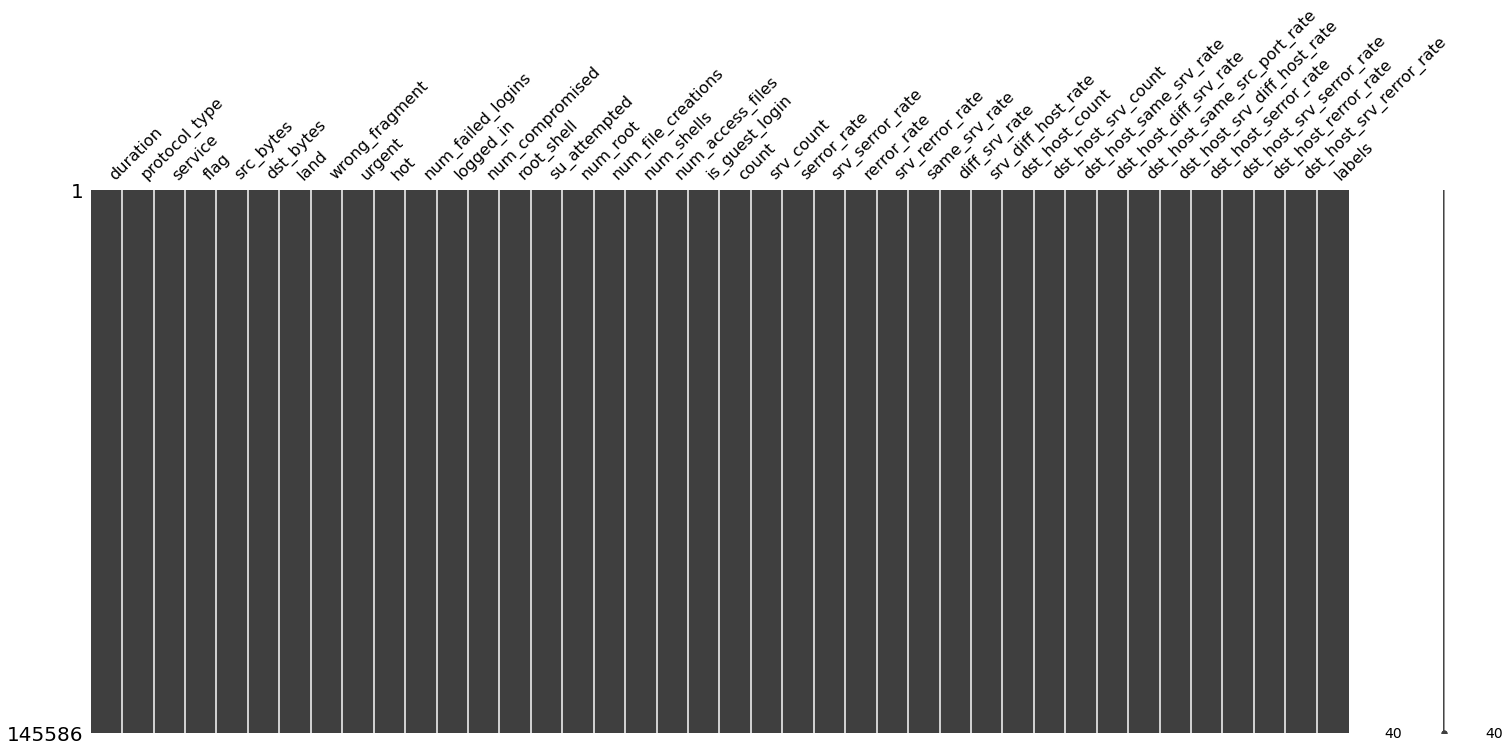

In [11]:
# Checking for missing values of features and labels if exist
missingno.matrix(data)
plt.show()

In [12]:
for column in data.columns[data.nunique()<30]:
    print(data[column].value_counts()/len(data))
    print('')

tcp     0.899214
udp     0.084259
icmp    0.016526
Name: protocol_type, dtype: float64

SF        0.600738
S0        0.290399
REJ       0.101054
RSTO      0.003908
RSTR      0.002919
S1        0.000392
SH        0.000234
S2        0.000165
RSTOS0    0.000076
S3        0.000069
OTH       0.000048
Name: flag, dtype: float64

0    0.999863
1    0.000137
Name: land, dtype: float64

0    0.992300
3    0.006251
1    0.001449
Name: wrong_fragment, dtype: float64

0    0.999973
1    0.000014
2    0.000007
3    0.000007
Name: urgent, dtype: float64

0     0.986558
2     0.006580
28    0.001882
1     0.001752
4     0.000769
6     0.000714
5     0.000350
3     0.000261
14    0.000254
30    0.000192
22    0.000192
19    0.000158
24    0.000089
18    0.000089
20    0.000069
7     0.000034
17    0.000014
12    0.000014
16    0.000007
10    0.000007
15    0.000007
9     0.000007
Name: hot, dtype: float64

0    0.999567
1    0.000392
2    0.000021
5    0.000007
4    0.000007
3    0.000007
Name: num_fa

In [13]:
X = data.drop(['labels'],axis=1)
y = data['labels']

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [15]:
# Checking number of unique categories for service variable
X_train['service'].nunique()

64

In [16]:
# Checking frequency of each category type for service variable
X_train['service'].value_counts()

http           43418
private        34362
smtp            6825
domain_u        3774
other           3363
ftp_data        3219
ecr_i            726
eco_i            642
ftp              562
finger           453
telnet           383
urp_i            308
ntp_u            209
auth             207
pop_3            154
time             105
mtp               86
iso_tsap          84
csnet_ns          84
discard           82
sql_net           82
vmnet             81
domain            80
gopher            80
whois             80
rje               79
systat            79
remote_job        79
klogin            78
echo              78
imap4             78
hostnames         77
supdup            76
kshell            75
bgp               73
login             73
nntp              73
ssh               73
nnsp              72
pop_2             72
shell             72
courier           72
printer           71
netbios_ssn       71
uucp_path         70
Z39_50            69
sunrpc            69
netbios_dgm  

In [17]:
# Hash encoding on Service variable
hashencoder = ce.hashing.HashingEncoder(cols='service', n_components=8)
X_train_encoded = hashencoder.fit_transform(X_train, y_train)
X_test_encoded = hashencoder.transform(X_test, y_test)

X_train_encoded = X_train_encoded.rename(columns = {'col_0':'service_hash1','col_1':'service_hash2','col_2':'service_hash3',
                                  'col_3':'service_hash4','col_4':'service_hash5','col_5':'service_hash6',
                                  'col_6':'service_hash7','col_7':'service_hash8'})
X_test_encoded = X_test_encoded.rename(columns = {'col_0':'service_hash1','col_1':'service_hash2','col_2':'service_hash3',
                                  'col_3':'service_hash4','col_4':'service_hash5','col_5':'service_hash6',
                                  'col_6':'service_hash7','col_7':'service_hash8'})

In [18]:
# One hot encoding on protocol_type and flag variable
onehotencoder = ce.OneHotEncoder(cols=['protocol_type','flag'])
X_train_encoded = onehotencoder.fit_transform(X_train_encoded)
X_test_encoded = onehotencoder.transform(X_test_encoded)

In [19]:
# Random Forest classifier with default hyperparameters
clf = RandomForestClassifier()
clf.fit(X_train_encoded, y_train)
y_pred = clf.predict(X_test_encoded)
print(classification_report(y_test,y_pred,digits=6))

              precision    recall  f1-score   support

    neptune.   1.000000  1.000000  1.000000     15596
     normal.   0.999090  0.999697  0.999393     26360
      others   0.995305  0.986047  0.990654      1720

    accuracy                       0.999267     43676
   macro avg   0.998132  0.995248  0.996682     43676
weighted avg   0.999266  0.999267  0.999266     43676



In [20]:
def cf_matrix_plot(cf_matrix, labeled):
    """
        Plots a confusion matrix for binary classification problem using heatmaps.
    """
    group_counts = [f"{value}" for value in cf_matrix.flatten()]
    group_percentages = [f"{value:.2f}%" for value in cf_matrix.flatten()/np.sum(cf_matrix)*100]
    labels = [f"{v2}\n{v3}" for v2, v3 in zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(3,3)
    plt.figure(figsize=(15,8))
    sns.heatmap(cf_matrix, annot=labels, fmt='', xticklabels=labeled,yticklabels=labeled)
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual labels')
    plt.show()

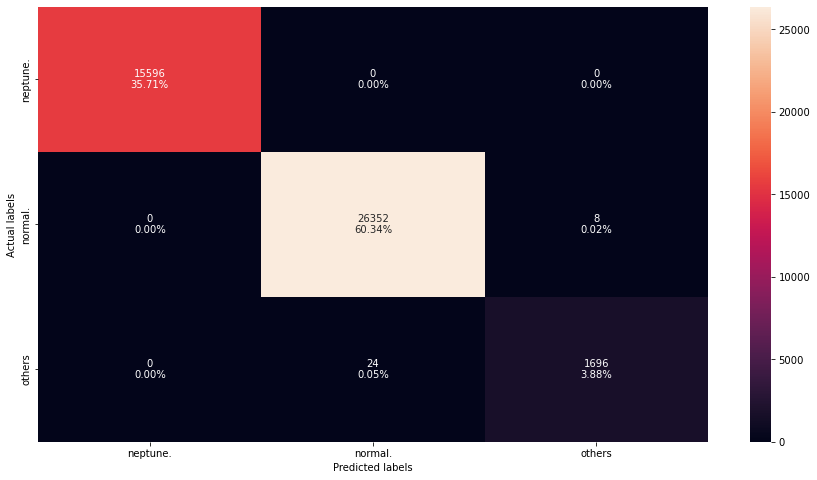

In [21]:
# Confusion matrix heatmap
y_pred = clf.predict(X_test_encoded)    
cf_matrix = confusion_matrix(y_test,y_pred)
cf_matrix_plot(cf_matrix,['neptune.','normal.','others'])

In [22]:
# Random Forest classifier with balanced class weight
clf = RandomForestClassifier(class_weight='balanced')
clf.fit(X_train_encoded, y_train)
y_pred = clf.predict(X_test_encoded)
print(classification_report(y_test,y_pred,digits=6))

              precision    recall  f1-score   support

    neptune.   1.000000  1.000000  1.000000     15596
     normal.   0.999128  0.999734  0.999431     26360
      others   0.995892  0.986628  0.991238      1720

    accuracy                       0.999313     43676
   macro avg   0.998340  0.995454  0.996890     43676
weighted avg   0.999312  0.999313  0.999312     43676



In [23]:
# Bayes search cv for random forest classifier
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
params = {'criterion':Categorical(['gini','entropy']), 
          'n_estimators': Integer(100,10000), 
          'max_depth': Categorical([None,2,3,4,5,6,7,8,9,10]),
          'min_samples_split': Integer(2,1000),
          'min_samples_leaf': Integer(1,1000),
          'max_features': Categorical(['auto', 'sqrt', 'log2']),
          'max_leaf_nodes': Categorical([None,2,3,4,5,6,7,8,9,10]),
          'min_impurity_decrease': Real(0,1),
          'class_weight': Categorical(['balanced','balanced_subsample',None]),
          'ccp_alpha': Real(0,0.8)}

clf_cv = BayesSearchCV(RandomForestClassifier(),params,cv=5,verbose=1,n_jobs=-1,scoring='accuracy',n_iter=20)
clf_cv.fit(X_train_encoded, y_train)
clf_cv.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

OrderedDict([('ccp_alpha', 0.0),
             ('class_weight', 'balanced'),
             ('criterion', 'gini'),
             ('max_depth', None),
             ('max_features', 'auto'),
             ('max_leaf_nodes', 10),
             ('min_impurity_decrease', 0.0),
             ('min_samples_leaf', 1),
             ('min_samples_split', 2),
             ('n_estimators', 10000)])

In [24]:
# Random Forest classifier with with best hyperparameters from bayes search cv
clf = RandomForestClassifier(criterion=clf_cv.best_params_['criterion'],
                             n_estimators=clf_cv.best_params_['n_estimators'],
                             max_depth=clf_cv.best_params_['max_depth'],
                             min_samples_split=clf_cv.best_params_['min_samples_split'],
                             min_samples_leaf=clf_cv.best_params_['min_samples_leaf'],
                             max_features=clf_cv.best_params_['max_features'],
                             max_leaf_nodes=clf_cv.best_params_['max_leaf_nodes'],
                             min_impurity_decrease=clf_cv.best_params_['min_impurity_decrease'],
                             class_weight=clf_cv.best_params_['class_weight'],
                             ccp_alpha=clf_cv.best_params_['ccp_alpha'])
clf.fit(X_train_encoded, y_train)
y_pred = clf.predict(X_test_encoded)
print(classification_report(y_test,y_pred,digits=6))

              precision    recall  f1-score   support

    neptune.   0.999231  0.999936  0.999583     15596
     normal.   0.999360  0.948217  0.973117     26360
      others   0.554611  0.986047  0.709920      1720

    accuracy                       0.968175     43676
   macro avg   0.851067  0.978066  0.894207     43676
weighted avg   0.981800  0.968175  0.972203     43676



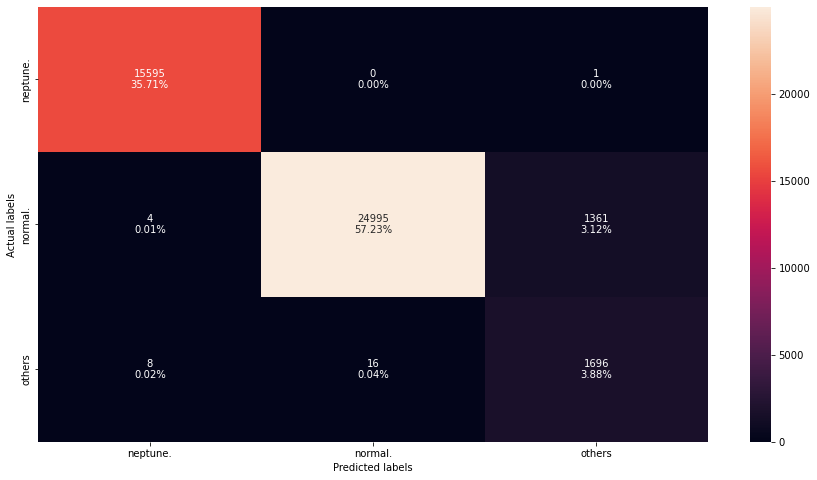

In [25]:
# Confusion matrix heatmap
y_pred = clf.predict(X_test_encoded)    
cf_matrix = confusion_matrix(y_test,y_pred)
cf_matrix_plot(cf_matrix,['neptune.','normal.','others'])

## Random Forest Regressor Example

Refer to the following documentation for more details about the use of Random Forest Regression on sklearn library:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

The following example below illustrates the process of creating a Random Forest regression model using sklearn library.

In [26]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor

In [27]:
data = fetch_california_housing()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.Series(data['target'])

In [28]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [29]:
# Random Forest Regressor with default hyperparameters
reg = RandomForestRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(f"R-squared value: {reg.score(X_test,y_test)}")

R-squared value: 0.7918253667696433


In [30]:
# Bayes search cv for random forest regressor
params = {'n_estimators': Integer(100,100000), 
          'max_depth': Categorical([None,2,3,4,5,6,7,8,9,10]),
          'min_samples_split': Integer(2,10000),
          'min_samples_leaf': Integer(1,10000),
          'max_features': Categorical(['auto', 'sqrt', 'log2']),
          'max_leaf_nodes': Categorical([None,2,3,4,5,6,7,8,9,10]),
          'min_impurity_decrease': Real(0,1),
          'ccp_alpha': Real(0,0.8)}

reg_cv = BayesSearchCV(RandomForestRegressor(),params,cv=5,verbose=1,n_jobs=-1,n_iter=20)
reg_cv.fit(X_train, y_train)
reg_cv.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

OrderedDict([('ccp_alpha', 0.21527204280326517),
             ('max_depth', 10),
             ('max_features', 'auto'),
             ('max_leaf_nodes', 7),
             ('min_impurity_decrease', 0.0),
             ('min_samples_leaf', 869),
             ('min_samples_split', 3252),
             ('n_estimators', 57031)])

In [31]:
# Random Forest regressor with best hyperparameters from bayes search cv
reg = RandomForestRegressor(n_estimators=reg_cv.best_params_['n_estimators'],
                            max_depth=reg_cv.best_params_['max_depth'],
                            min_samples_split=reg_cv.best_params_['min_samples_split'],
                            min_samples_leaf=reg_cv.best_params_['min_samples_leaf'],
                            max_features=reg_cv.best_params_['max_features'],
                            max_leaf_nodes=reg_cv.best_params_['max_leaf_nodes'],
                            min_impurity_decrease=reg_cv.best_params_['min_impurity_decrease'],
                            ccp_alpha=reg_cv.best_params_['ccp_alpha'])
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(f"R-squared value: {reg.score(X_test,y_test)}")

R-squared value: 0.31790829050658664
